# Calcul Numérique TP3



## Exercice 1: Influence de la fréquence d’échantillonnage sur la visualisation d’un signal

Avec des outils numériques, le temps n’est pas continu mais discret. Pour discrétiser un signal continu, il suffit de prendre un échantillon de ce signal continu toutes les Te secondes. Te est appelé période d’échantillonnage, la fréquence d’échantillonnage est définie par $Fe = 1/Te$.
Un signal sinusoidal est un signal continu défini par l’équation:
$$x(t) = a \sin(2 \pi f_0 t + \phi)$$

où $a$ est l’amplitude, $f_0$ la fréquence de la sinusoide et $\phi$ la phase. Nous allons générer ce signal à l’aide du paquet `numpy` de Python avec une fréquence d’échantillonnage de `Fe = 100 Hz`

1) Créer un vecteur de temps t allant de 0 à 1 sec. 
- [ ] quelle sera la durée entre 2 instants successifs ? 
- [ ] combien de valeurs contient le vecteur de temps ?

In [4]:
import numpy as np
import matplotlib.pyplot as plt

Fe = 100
t = np.linspace(0,1,Fe)

2) Déterminer l’index de t correspondant à la valeur de 50 ms ? 
On pourra utiliser la méthode `np.where`

In [62]:
t = np.linspace(0,1,100)
print (np.where(t >= 0.05)[0][0])
# Ou utiliser is closest 

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

3) Générer un signal sinusoidal de paramètres $a = 1.5$, $\phi = 0$ et $f_0 = 10$ Hz.

- [ ] tracer le signal sinusoidal entre 0 et 1 s. 
- [ ] mesurer la période réelle et la comparer avec la période du signal ($T_0$)        
- [ ] tracer le signal entre 50 ms et 150 ms. Vous devez observer des lignes brisées. Pourquoi ?

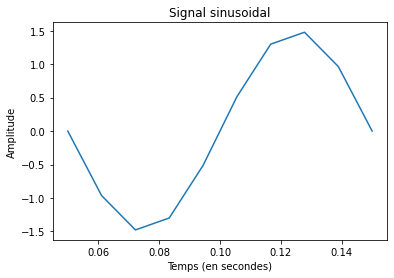

In [89]:
import math 

def signal(t):
    x = 1.5 * np.sin(2 * math.pi * 10 * t)
    return x

def plotSignal(t, x):
    plt.plot(t,x)
    plt.xlabel("Temps (en secondes)")
    plt.ylabel("Amplitude")
    plt.title("Signal sinusoidal")
    plt.show()

Fe = 100 # nombre de points en une seconde 
# t = np.linspace(0,1,Fe) # Pour tracer le signal sinusoidal entre 0 et 1 s
t = np.linspace(0.05,0.150, (int)(Fe * 0.1)) # Fe * 0.1 car 100 ms 
# Lignes brisées : car moins de points vu que 100 ms
plotSignal(t, signal(t))

4) Etant donné que le signal $x(t)$ est en réalité une suite numérique discrète $(x_n)_{n\in N}$, on peut aussi utiliser la fonction `plt.stem(t,x)` à la place de `plt.plot(t, x)`. Essayer cette nouvelle fonction. 
- [ ] Qu’en pensez-vous? 

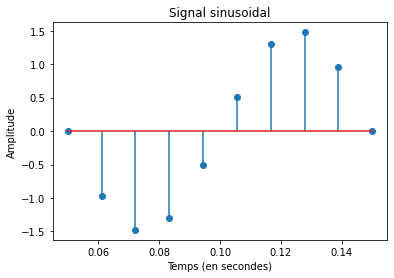

In [72]:
import math 

def signal(t):
    x = 1.5 * np.sin(2 * math.pi * 10 * t)
    return x

def plotSignal(t, x):
    plt.stem(t,x)
    plt.xlabel("Temps (en secondes)")
    plt.ylabel("Amplitude")
    plt.title("Signal sinusoidal")
    plt.show()

Fe = 100 # nombre de points en une seconde 
t = np.linspace(0.05,0.150, (int)(Fe * 0.1)) # Fe * 0.1 car 100 ms 
plotSignal(t, signal(t))

5) Augmenter la fréquence d’échantillonnage et afficher le signal entre 50 ms et 150 ms. 
- [ ] qu’observez- vous ? Plus on augmente la fréquence d'échantillonnage, plus il y a de points, plus cela ressemble à une courbe. 

Intuitivement, nous pouvons penser qu’une bonne restitution du signal nécessite une fréquence d’échantillonnage élevée en mesurant la période directement sur la signal obtenu.

6) Fixer la fréquence d’échantillonnage `Fe = 1000 Hz`. Et compléter le tableau suivant ($T0 = 1/f0$):

|n° | Fe | f0 | Période T0 réelle | Période mesurée |
|:--:|:--:|:--:|:--:|:--:|
|1 | 1000 |  10 | 0.1 | 0.10 |
|1 | 1000 | 300 | 0.0033333333333333335 | 0.83 |
|1 | 1000 | 500 | 0.002 | Pas possible |
|1 | 1000 | 990 | 0.00101010101010101 | Pas possible |

- [ ] Que remarquez-vous ?
- [ ] lorsque Fe = 2f0, l’échantillonnage n’est plus capable de capturer la fréquence de la sinusoïde. (https://www.youtube.com/watch?v=jQDjJRYmeWg)
- [ ] Lorsque Fe < 2f0, on parle de **repliement du spectre (aliasing)**. (https://www.youtube.com/watch?v=jHS9JGkEOmA)

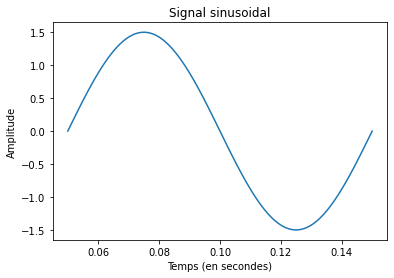

TO =  0.001


In [94]:
f0 = 1000

def signal(t):
    x = 1.5 * np.sin(2 * np.pi * f0 * t)
    return x

def plotSignal(t, x):
    plt.plot(t,x)
    plt.xlabel("Temps (en secondes)")
    plt.ylabel("Amplitude")
    plt.title("Signal sinusoidal")
    plt.show()

Fe = 1000 # nombre de points en une seconde 
t = np.linspace(0.05,0.150, (int)(Fe * 0.1)) # Fe * 0.1 car 100 ms 
plotSignal(t, signal(t))
print ("TO = ", 1/f0)

7) Afin de lire et d’écrire des fichiers WAV, on peut utiliser les fonctions wavfile du module python scipy: 

- [ ] écrire 3 fichiers WAV correspondants aux paramètres des signaux No2, 3 et 4. Les écouter (sans casque).

*Remarque importante:*

Les résultats de ces observations sont fondamentaux pour le traitement du signal. Le théorème de Shannon formalise la condition permettant d’échantillonner correctement un signal.
$$F_e > 2f_{max}$$

In [31]:
from scipy.io import wavfile
import numpy as np

Fe = 1000

def signal(t, f0):
    x = 1.5 * np.sin(2 * np.pi * f0 * t)
    return x

t = np.linspace(0,1,Fe)
wavfile.write("signal2.wav", Fe, signal(t,300)) 
wavfile.write("signal3.wav", Fe, signal(t,500)) 
wavfile.write("signal4.wav", Fe, signal(t,990)) 

## Exercice 2: Décomposition en séries de Fourier

La mathématicien Fourier a démontré qu’il était possible de décomposer un signal périodique de fréquence fondamentale $f_0$ en une somme de plusieurs sinusoïdes de fréquences multiples $k f_0$ avec $k \in N$ Mathématiquement, n’importe quel signal périodique $s(t)$ peut donc s’exprimer sous la forme:

$$s(t) = a_0 + \sum_{k=1}^{\infty} a_k \cos (2 \pi k f_0 t) + \sum_{k=1}^{\infty} b_k \sin (2 \pi k f_0 t)$$

Le tableau suivant présente les premières valeurs des coefficients ak et bk pour plusieurs signaux périodiques (ces valeurs s’obtiennent à l’aide des sommes infinies, cf cours).

|Signal | ak | b1 | b2 | b3 | b4 | b5 | b6 | b7 | b8 | b9 |
|: ----:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
| carré | 0  | 1  | 0  | 1/3| 0  | 1/5| 0  | 1/7| 0  | 1/9|
| triangle | 0  | 1  | 0  | -1/9| 0  | 1/25| 0  | -1/49| 0  | 1/81|
| dent de scie | 0  | 1  | -1/2  | 1/3| -1/4 | 1/5| -1/6  | 1/7| -1/8| 1/9|

1) synthétiser un signal carré, triangulaire et en dent de scie avec les fréquences fondamentales suivantes: f0 = 10 Hz et f0 = 1000 Hz. Les signaux seront échantillonnés à la fréquence Fe = 8 kHz sur une durée de 1 sec.

Astuce: on pourra créer une matrice numpy contenant 10 colonnes. Chaque colonne correspondant à un signal sinusoidal particulier (comme vu dans l’Ex. 1). s(t) sera obtenu en faisant la somme des colonnes.


In [33]:

def signal(t, ):
    x = ak + 

SyntaxError: invalid syntax (<ipython-input-33-016e26ac3c64>, line 2)

2) Tracer ces 6 signaux en fonction du temps.

3) Créer des fichiers WAV correspondant aux 6 situations précédentes. Les écouter. Qu’en pensez-vous ?

## Exercice 3: Transformée de Fourier

La transformée de Fourier est très utilisée pour l’analyse des signaux (contenu fréquentiel, spectrogramme, périodigramme, etc.). Cette transformée permet de mettre en valeur des éléments de notre signal difficilement visualisables dans le domaine temporel.
Mathématiquement, la transformée de Fourier d’un signal x(t) s’exprime sous la forme

$$x(t) = \int_{-\infty}^{+\infty} x(t) e^{- 2j \pi ft} dt$$
où X(f) correspond à la transformée de Fourier du signal x(t).

La plupart des langages de programmation intègrent des fonctionnalités pour le calcul de la transformée de Fourier via des algorithmes rapides. Ces algorithmes sont couramment nommés FFT (Fast Fourier Transform). Dans cette exercice, nous allons illustrer l’intérêt de cette transformée.

1) Créer un signal d’1 sec. carré de fréquence fondamentale f0 = 120 Hz et de fréquence d’échantillonnage 8 kHz. Le tracer en fonction du temps.

2) La famille de fonctions `fft` de numpy permet de réaliser des opérations suivant les normes de calcul de la FFT (Fast FourrierTransform). Parmi ces fonctions, la fft calcule la transformée de Fourier rapide d’un signal (à 1 dimension).

- [ ] calculer la fft du signal carré
- [ ] du signal triangulaire
- [ ] observer quelques valeurs de la FFT, que remarquez-vous ?

In [ ]:
from numpy.fft import fft
X = fft(x)# ou éventuellement X = fft(x, 512)

3) La FFT d’un signal contenant N échantillons contient elle-aussi N échantillons. Alors que les échantillons temporels de x(t) sont espacés de Te, les échantillons fréquentiels de X(f) sont espacés de Fe. 

- [ ] quelle est la fréquence maximum ? 
- [ ] déterminer alors un vecteur correspondant aux fréquences.

4) Le module de la FFT est obtenu avec `np.abs(X)`, la puissance `np.abs(X)**2` et sa phase `np.angle(X)`.

- [ ] Tracer le module et la phase de X en fonction des fréquences.

Vous observez une série de raies. 
- [ ] à quelle fréquence est la première raie ? 
- [ ] dans le cas où le signal est constitué d’une seule sinusoïde (et pas une somme comme dans la décomposition de Fourrier), qu’observerait-on ? 
- [ ] que se passe-t-il si vous modifiez la valeur de la fréquence fondamentale (par exemple à 50 Hz et à 3000 Hz )?

## Pour s'amuser

Voici les coefficients de Fourier (module et phase) de deux fonctions que vous allez pouvoir tracer. La première correpond à la partie supérieure et la seconde à la partie inférieur.

Vous avez les coefficients de Fourier, ainsi que le détail du code permettant d'obtenir le vecteur temps et l'affichage. Il vous reste à code la fonction `synthesis(t, An, phi_n)`. Le graphe obtenu devrait vous rappeler un superhéros.

In [ ]:
an_sup = np.array([1.74722779e+00, 1.34459832e-03, 3.75986360e-01, 6.73651433e-01,
                   3.88495643e-01, 2.48505670e-01, 1.43402599e-01, 3.19814886e-02,
                   3.61533388e-02, 1.76966727e-02, 1.47718873e-01, 1.38662046e-01,
                   1.21789359e-01, 1.40601563e-03, 2.18950058e-02, 8.25346440e-03,
                   1.72732385e-02, 6.87718738e-02, 8.07756585e-02, 8.39074460e-02,
                   2.95682297e-02])
phin_sup = [0.00000000e+00, 3.14159265e+00, -3.14159265e+00, -6.03152647e-17,
            0.00000000e+00, 4.90509507e-16, -3.14159265e+00, -3.14159265e+00,
            -3.14159265e+00, -4.59198916e-15, -3.14159265e+00, 3.14159265e+00,
            -3.14159265e+00,  3.14159265e+00,  3.14159265e+00,  3.14159265e+00,
            3.14159265e+00, -2.03092706e-16,  2.51508098e-16,  0.00000000e+00,
            -1.20238959e-15]

an_inf = [-1.71428222, 0.13538015, 0.13626947, 0.47015748, 0.16971303,
          0.02041353, 0.1253294, 0.24046143,  0.00648812,  0.03988416,
          0.00206612,  0.0096856, 0.03662899,  0.0768686,   0.05076733,
          0.02945466,  0.01157774,  0.02443473, 0.01943924,  0.00324861,
          0.02079461]
phin_inf = [3.14159265e+00, -3.14159265e+00,  0.00000000e+00, -3.14159265e+00,
            -2.39412760e-16,  3.14159265e+00,  3.14159265e+00, -3.14159265e+00,
            -3.13121812e-15,  3.14159265e+00, -3.14159265e+00, -3.14159265e+00,
            0.00000000e+00,  3.14159265e+00,  3.14159265e+00, -3.14159265e+00,
            -4.38680974e-16, -3.14159265e+00,  1.56763302e-15,  3.14159265e+00,
            3.14159265e+00]

In [ ]:
def synthesis(t,An,phi_n):
    #à compléter
    return x

#On considère que le signal est périodique de période 14 sec. 
#On se concentrera sur l'intervalle de temps [-7; 7]sec
Ts = 0.01 #sampling period
T0 = 14 #(t[-1]-t[0])
t = np.arange(0, T0, Ts)
f0 = 1/T0
t_new = np.arange(-7,7,Ts)
for an, phin in zip([an_sup, an_inf], [phin_sup, phin_inf]):
    f_new = synthesis(t_new,an,phin)
    plt.plot(t_new,f_new,"r")
    plt.ylim([-3,3])
plt.show()

Pour les curieux, le code complet peut être trouvé ici: https://www.enib.fr/~choqueuse/articles/signal_processing/batman_fourier.html